<a href="https://colab.research.google.com/github/bsmoores/AI-portfolio/blob/main/Lab9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
from torchvision import datasets, transforms
import numpy as np
# Define a transform to normalize the data
transform = transforms.Compose([transforms.ToTensor()])

# Download and load the MNIST training data
train_data = datasets.MNIST(root='./data', train=True, download=True, transform=transform)

# Extracting the data and targets as tensors
train_images = train_data.data
train_labels = train_data.targets

train_images.shape, train_labels.shape
#sets up the MNIST dataset for training and provides a utility function to extract batches of data, which is essential for training neural networks in batches.

100%|██████████| 9912422/9912422 [00:00<00:00, 137097284.63it/s]


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw



100%|██████████| 28881/28881 [00:00<00:00, 38912847.36it/s]

Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw




100%|██████████| 1648877/1648877 [00:00<00:00, 110373472.23it/s]


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw



100%|██████████| 4542/4542 [00:00<00:00, 11353116.07it/s]

Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



(torch.Size([60000, 28, 28]), torch.Size([60000]))

In [2]:
import matplotlib.pyplot as plt #create plots, set titles, labels, legends, and customize other aspects of the plot's appearance.

In [3]:
28*28

784

In [4]:
train_images[0,:,:] #will display the first image from the train_images tensor using matplotlib.

tensor([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,  18,
          18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   

In [5]:
x = train_images[0,:,:]

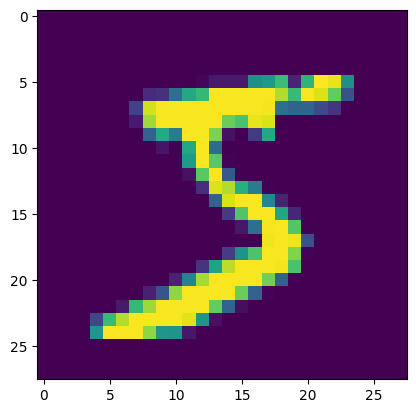

In [6]:
plt.imshow(x)

In [7]:
train_labels[0]

tensor(5)

In [8]:
x.shape

torch.Size([28, 28])

In [9]:
x.flatten()

tensor([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,  18,
         18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,  30,  36,  94, 1

In [10]:
x = x.flatten()

In [11]:
x.shape

torch.Size([784])

In [12]:
x = x.reshape(28,28)

In [13]:
x.shape

torch.Size([28, 28])

In [14]:
m = torch.rand(10,784)

In [15]:
m

tensor([[0.6240, 0.2981, 0.4000,  ..., 0.8750, 0.4150, 0.6760],
        [0.6808, 0.5599, 0.8439,  ..., 0.1572, 0.9205, 0.9223],
        [0.8436, 0.1051, 0.7889,  ..., 0.1116, 0.9653, 0.6277],
        ...,
        [0.0301, 0.3388, 0.1706,  ..., 0.9366, 0.2598, 0.0547],
        [0.8936, 0.7838, 0.9795,  ..., 0.8182, 0.2709, 0.2368],
        [0.1791, 0.3664, 0.3420,  ..., 0.4519, 0.2892, 0.1822]])

In [16]:
m.shape

torch.Size([10, 784])

In [17]:
x = x.flatten()

In [18]:
x = x/255.0

In [19]:
x

tensor([0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 

In [20]:
m.shape,x.shape

(torch.Size([10, 784]), torch.Size([784]))

In [21]:
m@x

tensor([54.0477, 49.8487, 49.8792, 49.5058, 55.1994, 55.5120, 57.2941, 52.2577,
        57.2197, 55.2883])

In [22]:
y = torch.matmul(m,x)

In [23]:
y

tensor([54.0477, 49.8487, 49.8792, 49.5058, 55.1994, 55.5120, 57.2941, 52.2577,
        57.2197, 55.2883])

In [24]:
torch.max(y)

tensor(57.2941)

In [25]:
torch.argmax(y)

tensor(6)

In [26]:
x = train_images[0:25,:,:]/255.0

In [27]:
x.shape

torch.Size([25, 28, 28])

In [28]:
x = x.reshape(25,784)

In [29]:
x.shape

torch.Size([25, 784])

In [30]:
x  = x.T

In [31]:
x.shape

torch.Size([784, 25])

In [32]:
y = m@x

In [33]:
y.shape

torch.Size([10, 25])

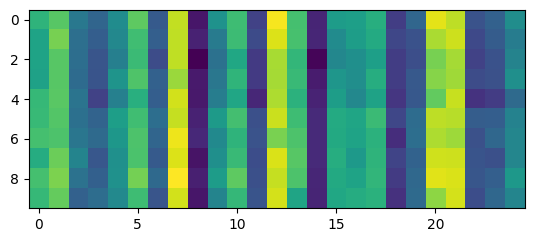

In [34]:
plt.imshow(y)